### 梯度下降 (Gradient Descent)

Have some Function $J(w, b)$ &nbsp;&nbsp; **--->** &nbsp;&nbsp; for **linear regression**, or **any other function** that we want to minimize.

want to **minimize** $J(w, b)$ and get $w$ and $b$

---

**outline :**
1. initialize $w$ and $b$ **randomly** &nbsp;&nbsp; **--->** &nbsp;&nbsp; a common choice is to **set them to $0$**.
   
2. **repeat** until convergence（收敛）:
   
   1. calculate the gradient of $J$ with respect to $w$ and $b$
   
   2. update $w$ and $b$ by subtracting the gradient multiplied by a small **learning rate** $\alpha$

---

**update $w$ and $b$ :**

$$
w = w - \alpha\frac{\partial J}{\partial w}
$$

$$
b = b - \alpha\frac{\partial J}{\partial b}
$$

***attention :*** update ***simultaneously*** , which means we need **temp variables** like:

$$
temp\_w = w - \alpha\frac{\partial J}{\partial w}
$$

$$
temp\_b = b - \alpha\frac{\partial J}{\partial b}
$$

$$
w, b = temp\_w, temp\_b
$$

---

**Linear Regression :**

for Linear Regression, the cost function is:
$$
J(w, b) = \frac{1}{2m}\sum_{i=1}^m(f(x_i) - y_i)^2
$$

where $f(x_i) = wx_i + b$

so **gradient of $w$ and $b$ is :**

$$
\frac{\partial J}{\partial w} = \frac{1}{m}\sum_{i=1}^m(f(x_i) - y_i)x_i
$$

$$
\frac{\partial J}{\partial b} = \frac{1}{m}\sum_{i=1}^m(f(x_i) - y_i)
$$

---

**Batch Gradient Descent :**

- **batch** means each step of gradient descent uses **all** the training examples.


In [74]:
import numpy as np
import matplotlib.pyplot as plt

def gen_data(w_true, b_true, n=300, noise=0.15):
    X = np.random.rand(n, 1)  # nums and fea_dims, 1 here
    y = X.squeeze() * w_true + b_true + np.random.normal(0, noise, n)
    return X, y

def draw_data(w_true, b_true):
    X, y = gen_data(w_true, b_true)
    plt.scatter(X, y)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()
    return X, y

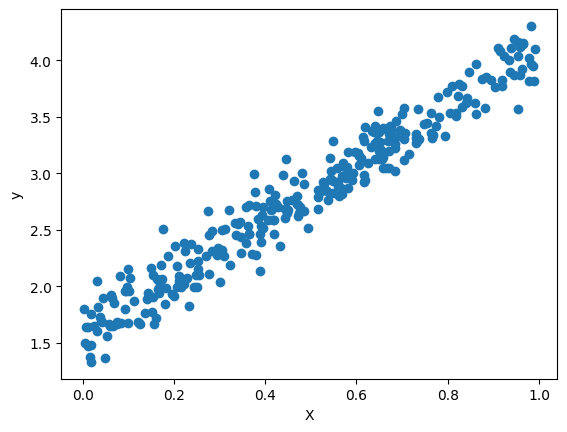

In [75]:
X, y = draw_data(2.5, 1.6)

In [76]:
class LinearRegression:
    
    def __init__(self):
        self.w = None
        self.b = None
    
    def mse(self, y_pred, y):
        return np.mean((y_pred - y) ** 2) / 2

    def compute_grad(self, nums, loss, X):
        gw = (1 / nums) * np.dot(loss, X)
        gb = (1 / nums) * np.sum(loss)
        return gw, gb

    def train(self, X, y, lr=0.01, epochs=1000):
        nums, feas = X.shape
        self.w = np.zeros(feas)  # a commom initialization, 0 here
        self.b = 0
        for epoch in range(epochs):
            y_pred = X.dot(self.w) + self.b  # compute output
            loss = y_pred - y
            loss_f = self.mse(y_pred, y)  # compute loss
            gw, gb = self.compute_grad(nums, loss, X)  # compute gradients
            self.w -= lr * gw
            self.b -= lr * gb
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: loss={loss_f: .4f}")

    def predict(self, X):
        return X.dot(self.w) + self.b
            
    def validate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        mse = self.mse(y_pred, y_test)
        print(f"Validation MSE: {mse:.4f}")
        

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.train(X_train, y_train, lr=0.01, epochs=10000)
lr.validate(X_test, y_test)

Epoch 0: loss= 4.0971
Epoch 100: loss= 0.4038
Epoch 200: loss= 0.0925
Epoch 300: loss= 0.0613
Epoch 400: loss= 0.0539
Epoch 500: loss= 0.0490
Epoch 600: loss= 0.0448
Epoch 700: loss= 0.0411
Epoch 800: loss= 0.0378
Epoch 900: loss= 0.0349
Epoch 1000: loss= 0.0323
Epoch 1100: loss= 0.0300
Epoch 1200: loss= 0.0280
Epoch 1300: loss= 0.0262
Epoch 1400: loss= 0.0246
Epoch 1500: loss= 0.0232
Epoch 1600: loss= 0.0220
Epoch 1700: loss= 0.0209
Epoch 1800: loss= 0.0199
Epoch 1900: loss= 0.0191
Epoch 2000: loss= 0.0183
Epoch 2100: loss= 0.0176
Epoch 2200: loss= 0.0170
Epoch 2300: loss= 0.0165
Epoch 2400: loss= 0.0160
Epoch 2500: loss= 0.0156
Epoch 2600: loss= 0.0152
Epoch 2700: loss= 0.0149
Epoch 2800: loss= 0.0146
Epoch 2900: loss= 0.0144
Epoch 3000: loss= 0.0141
Epoch 3100: loss= 0.0139
Epoch 3200: loss= 0.0137
Epoch 3300: loss= 0.0136
Epoch 3400: loss= 0.0134
Epoch 3500: loss= 0.0133
Epoch 3600: loss= 0.0132
Epoch 3700: loss= 0.0131
Epoch 3800: loss= 0.0130
Epoch 3900: loss= 0.0130
Epoch 4000: 

In [78]:
print("w: ",lr.w)
print("b: ",lr.b)
# w_true is 2.5
# b_true is 1.6

w:  [2.47225169]
b:  1.6051299636887173


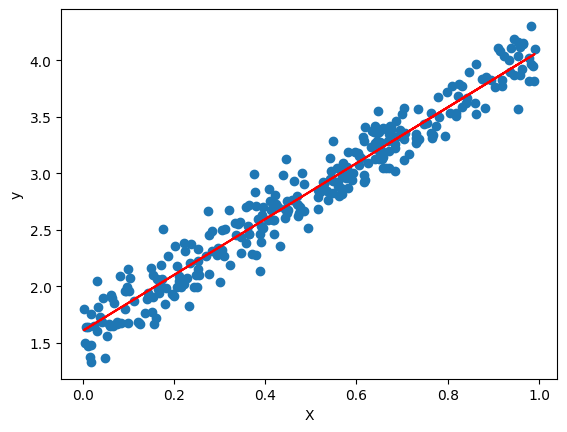

In [79]:
def draw_with_line(w, b):
    plt.scatter(X, y)
    plt.plot(X, X*w + b, color='red')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()
draw_with_line(lr.w, lr.b)

Pytorch 实现

In [80]:
import torch
import torch.nn as nn
import torch.optim as optim

In [94]:
class LinearRegressionTorch(nn.Module):
    def __init__(self, in_size):
        super(LinearRegressionTorch, self).__init__()
        self.linear = nn.Linear(in_size, 1)  # (input_size, output_size), 1 here

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred.squeeze()
    
model = LinearRegressionTorch(1)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

X = torch.from_numpy(X).float().to(device) if isinstance(X, np.ndarray) else X.float().to(device)
y = torch.from_numpy(y).float().to(device) if isinstance(y, np.ndarray) else y.float().to(device)

def train(model, optimizer, criterion, epochs=100):
    for epoch in range(epochs):
        output = model(X)
        loss = criterion(output, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 100 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

train(model, optimizer, criterion, epochs=5000)

Epoch 1/5000, Loss: 7.1969
Epoch 101/5000, Loss: 1.8594
Epoch 201/5000, Loss: 0.3431
Epoch 301/5000, Loss: 0.0945
Epoch 401/5000, Loss: 0.0665
Epoch 501/5000, Loss: 0.0582
Epoch 601/5000, Loss: 0.0514
Epoch 701/5000, Loss: 0.0455
Epoch 801/5000, Loss: 0.0405
Epoch 901/5000, Loss: 0.0364
Epoch 1001/5000, Loss: 0.0332
Epoch 1101/5000, Loss: 0.0307
Epoch 1201/5000, Loss: 0.0289
Epoch 1301/5000, Loss: 0.0276
Epoch 1401/5000, Loss: 0.0267
Epoch 1501/5000, Loss: 0.0262
Epoch 1601/5000, Loss: 0.0258
Epoch 1701/5000, Loss: 0.0255
Epoch 1801/5000, Loss: 0.0254
Epoch 1901/5000, Loss: 0.0253
Epoch 2001/5000, Loss: 0.0253
Epoch 2101/5000, Loss: 0.0252
Epoch 2201/5000, Loss: 0.0252
Epoch 2301/5000, Loss: 0.0252
Epoch 2401/5000, Loss: 0.0252
Epoch 2501/5000, Loss: 0.0252
Epoch 2601/5000, Loss: 0.0252
Epoch 2701/5000, Loss: 0.0252
Epoch 2801/5000, Loss: 0.0252
Epoch 2901/5000, Loss: 0.0252
Epoch 3001/5000, Loss: 0.0252
Epoch 3101/5000, Loss: 0.0252
Epoch 3201/5000, Loss: 0.0252
Epoch 3301/5000, Loss:

w = 2.503892183303833, b = 1.586356282234192


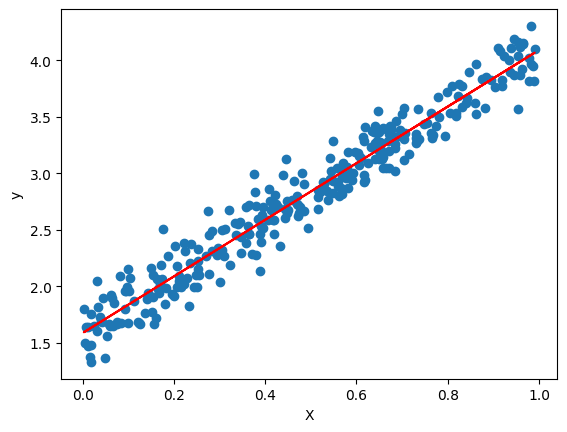

In [ ]:
w = model.linear.weight.item()
b = model.linear.bias.item()

print(f"w = {w}, b = {b}")

def draw_with_line_torch(X, y, w, b):
    X = X.cpu().numpy()
    y = y.cpu().numpy()
    plt.scatter(X, y)
    plt.plot(X, X*w + b, color='red')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

draw_with_line_torch(X, y, w, b)
# w_true = 2.5
# b_true = 1.6